In [48]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame()

for alpha in [0.2, 0.5, 0.6, 0.8]:
    df_aux = pd.read_csv(f'data/tests_{alpha}.csv')
    df['problem'] = df_aux['problem']
    df['optimal'] = df_aux['optimal']
    df[f'time_{alpha}'] = df_aux['time']
    df[f'cost_{alpha}'] = df_aux['cost']
    df[f'gap_{alpha}'] = (df_aux['cost'] - df_aux['optimal'])/df_aux['optimal']

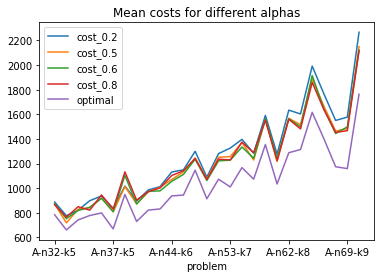

In [49]:
fig, ax = plt.subplots();
ax.set_title("Mean costs for different alphas")
df.groupby(['problem'], as_index=False).mean()[['problem', 'cost_0.2', 'cost_0.5', 'cost_0.6', 'cost_0.8', 'optimal']].plot(x="problem", ax=ax, legend=True);

gap_0.2    0.211529
gap_0.5    0.168154
gap_0.6    0.167104
gap_0.8    0.177121
dtype: float64


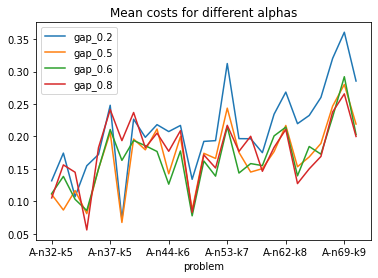

In [55]:
fig, ax = plt.subplots();
ax.set_title("Mean costs for different alphas")
mean_gap = df.groupby(['problem'], as_index=False).mean()[['problem', 'gap_0.2', 'gap_0.5', 'gap_0.6', 'gap_0.8']]
mean_gap.plot(x="problem", ax=ax, legend=True);
print(mean_gap.mean(numeric_only=True))

gap_0.2    0.189166
gap_0.5    0.152479
gap_0.6    0.151580
gap_0.8    0.161917
dtype: float64


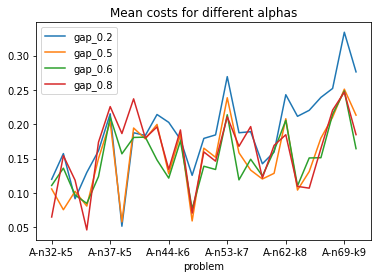

In [57]:
fig, ax = plt.subplots();
ax.set_title("Mean costs for different alphas")
min_gap = df.groupby(['problem'], as_index=False).min()[['problem', 'gap_0.2', 'gap_0.5', 'gap_0.6', 'gap_0.8']]
min_gap.plot(x="problem", ax=ax, legend=True);
print(min_gap.mean(numeric_only=True))